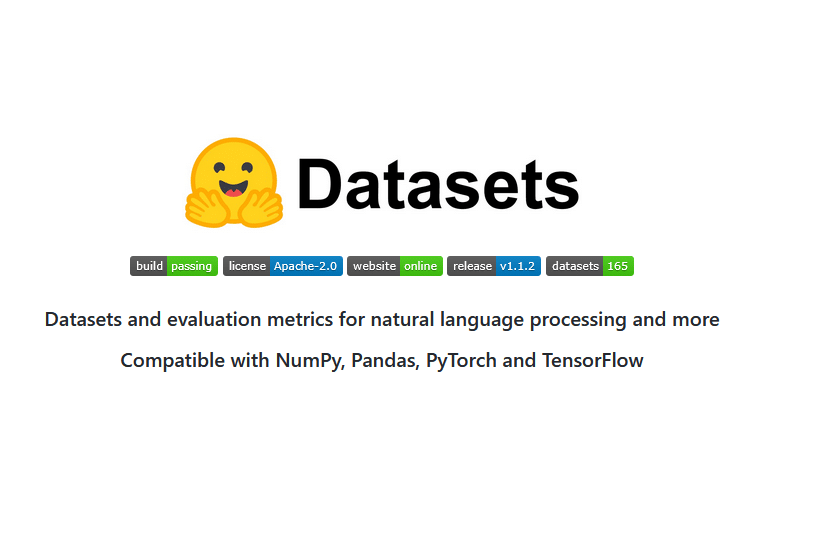

## Dataset https://huggingface.co/datasets/sst2

In [1]:
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 4.8 MB/s 
     |████████████████████████████████| 212 kB 62.6 MB/s 
     |████████████████████████████████| 163 kB 66.1 MB/s 
     |████████████████████████████████| 115 kB 73.9 MB/s 
     |████████████████████████████████| 127 kB 69.0 MB/s 
     |████████████████████████████████| 115 kB 69.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from datasets import load_dataset


sst2 = load_dataset('sst2')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset sst2 downloaded and prepared to /root/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
sst2

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [4]:
import pandas as pd

df_test = pd.DataFrame(sst2['test'])
df_train = pd.DataFrame(sst2['train'][:10000]) #only 10000 examples
df_validation = pd.DataFrame(sst2['validation'])


## Shallow pre-processing

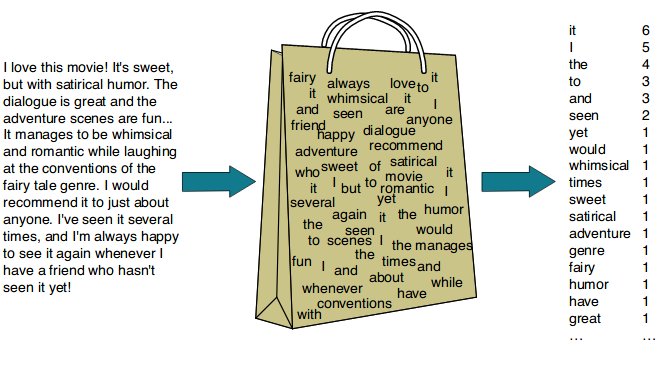

In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# Multiple documents
corpus = df_train.sentence
# create the transform
vectorizer = CountVectorizer(stop_words='english')


# tokenize and build vocab
vectorizer.fit(corpus)

# summarize
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'hide': 4015, 'new': 5721, 'secretions': 7466, 'parental': 6074, 'units': 9077, 'contains': 1785, 'wit': 9519, 'labored': 4802, 'gags': 3534, 'loves': 5097, 'characters': 1358, 'communicates': 1641, 'beautiful': 753, 'human': 4152, 'nature': 5671, 'remains': 6956, 'utterly': 9180, 'satisfied': 7330, 'remain': 6953, 'worst': 9583, 'revenge': 7080, 'nerds': 5710, 'clichés': 1522, 'filmmakers': 3260, 'dredge': 2556, 'far': 3150, 'tragic': 8775, 'merit': 5367, 'superficial': 8350, 'treatment': 8819, 'demonstrates': 2194, 'director': 2341, 'hollywood': 4072, 'blockbusters': 905, 'patriot': 6127, 'games': 3545, 'turn': 8896, 'small': 7826, 'personal': 6194, 'film': 3256, 'emotional': 2761, 'wallop': 9339, 'saucy': 7336, 'depressed': 2216, 'year': 9621, 'old': 5866, 'suicidal': 8329, 'poetry': 6357, 'deeply': 2132, 'thought': 8641, 'right': 7127, 'thinking': 8629, 'films': 3262, 'goes': 3678, 'absurd': 109, 'lengths': 4922, 'moviegoers': 5584, 'complain': 1662, 'make': 5180, 'mo

In [6]:
# encode document
train_vector = vectorizer.transform(df_train['sentence'])

test_vector = vectorizer.transform(df_test['sentence'])

validation_vector = vectorizer.transform(df_validation['sentence'])

In [7]:
train_vector[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [8]:
len(train_vector.toarray())

10000

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
# Creating training data set from bag-of-words
#
train_vector = train_vector

test_vector = test_vector

validation_vector = validation_vector
#
# Creating dummy label
#
train_labels = np.array(df_train.label)

test_labels = np.array(df_test.label)

validation_labels = np.array(df_validation.label)


**NB** For demonstration purposes we use validation_set instead of test_set

## ML Models

In [10]:
from sklearn import naive_bayes

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
#
#
Naive.fit(train_vector, train_labels)
#
# predict the labels on validation dataset
#
predictions_NB = Naive.predict(validation_vector)

# Use metrics.accuracy_score to measure the score
print("Naive Bayes Accuracy Score %.3f" %metrics.accuracy_score(validation_labels,predictions_NB))

Naive Bayes Accuracy Score 0.764


In [11]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#
#
SVM.fit(train_vector, train_labels)
#
# predict the labels on validation dataset
predictions_SVM = SVM.predict(validation_vector)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score %.3f" %metrics.accuracy_score(validation_labels,predictions_SVM))

SVM Accuracy Score 0.752




---



---



---



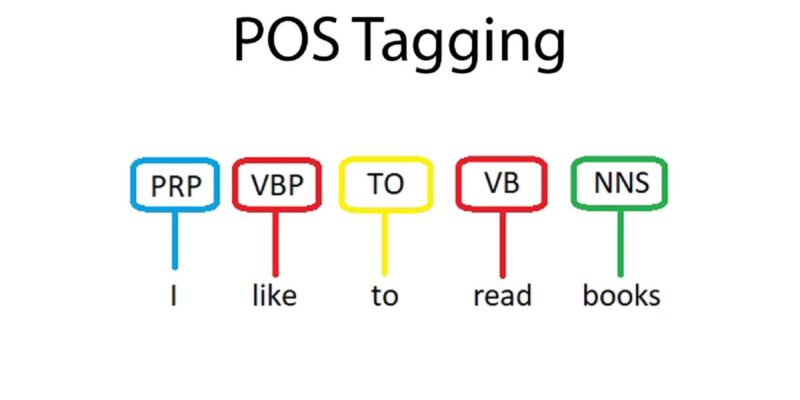

In corpus linguistics, **part-of-speech** tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

In [12]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

s = '''Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\n \n Thanks.'''
tokens = word_tokenize(s)
tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

In [44]:
nltk.pos_tag(tokens)

[('Good', 'JJ'),
 ('muffins', 'NNS'),
 ('cost', 'VBP'),
 ('$', '$'),
 ('3.88', 'CD'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('.', '.'),
 ('Please', 'NNP'),
 ('buy', 'VB'),
 ('me', 'PRP'),
 ('two', 'CD'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('.', '.'),
 ('Thanks', 'NNS'),
 ('.', '.')]

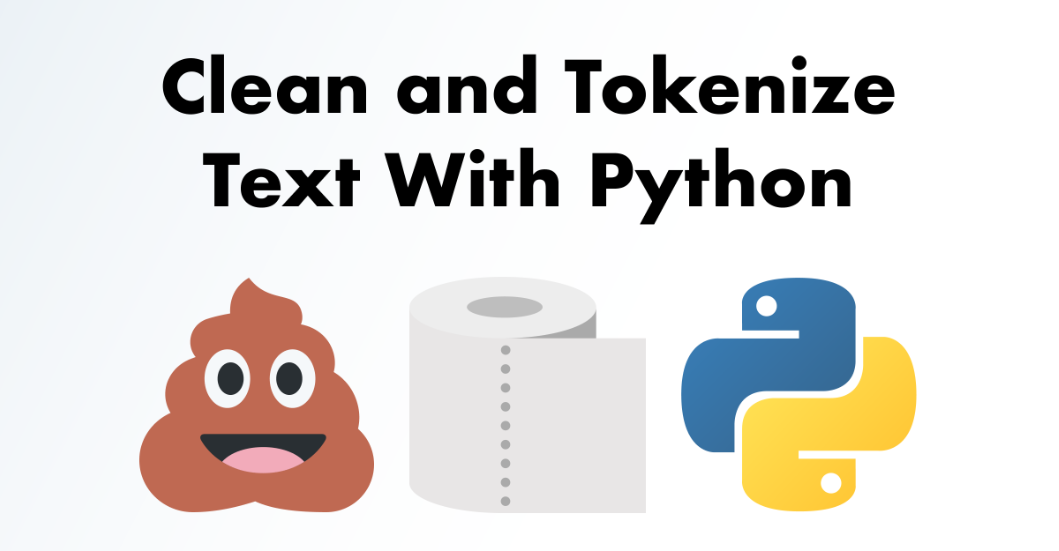

In [45]:
df_train['tokenized_sents'] = df_train.apply(lambda row: nltk.word_tokenize(row["sentence"]), axis=1)
df_validation['tokenized_sents'] = df_validation.apply(lambda row: nltk.word_tokenize(row["sentence"]), axis=1)

In [46]:
from nltk import pos_tag

df_train['tokenized_sents'] = df_train['tokenized_sents'].apply(lambda x: pos_tag(x))
df_validation['tokenized_sents'] = df_validation['tokenized_sents'].apply(lambda x: pos_tag(x))

In [47]:
df_train['tokenized_sents']

0       [(hide, RB), (new, JJ), (secretions, NNS), (fr...
1       [(contains, VBZ), (no, DT), (wit, NN), (,, ,),...
2       [(that, DT), (loves, VBZ), (its, PRP$), (chara...
3       [(remains, NNS), (utterly, RB), (satisfied, VB...
4       [(on, IN), (the, DT), (worst, JJS), (revenge-o...
                              ...                        
9995    [(dilutes, VBZ), (the, DT), (pleasure, NN), (o...
9996    [(the, DT), (emotion, NN), (is, VBZ), (impress...
9997    [(can, MD), (get, VB), (your, PRP$), (money, N...
9998    [(this, DT), (is, VBZ), (an, DT), (insultingly...
9999    [(the, DT), (most, RBS), (entertaining, JJ), (...
Name: tokenized_sents, Length: 10000, dtype: object

In [48]:
df_train["tokenized_sents"]= df_train["tokenized_sents"].apply(lambda x: ' '.join([el[1] for el in x]))
df_validation["tokenized_sents"]= df_validation["tokenized_sents"].apply(lambda x: ' '.join([el[1] for el in x]))


In [49]:
df_train["tokenized_sents"][0]

'RB JJ NNS IN DT JJ NNS'

In [50]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# Multiple documents
corpus = df_train.tokenized_sents 
corpus.append(df_validation.tokenized_sents)

# create the transform
vectorizer = CountVectorizer()


# tokenize and build vocab
vectorizer.fit(corpus)

# summarize
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'rb': 16, 'jj': 6, 'nns': 12, 'in': 5, 'dt': 2, 'vbz': 28, 'nn': 10, 'vbd': 24, 'prp': 15, 'cc': 0, 'to': 21, 'vb': 23, 'jjs': 8, 'vbp': 27, 'md': 9, 'rp': 19, 'pos': 14, 'rbr': 17, 'wp': 30, 'wrb': 31, 'vbg': 25, 'nnp': 11, 'vbn': 26, 'wdt': 29, 'jjr': 7, 'cd': 1, 'rbs': 18, 'ex': 3, 'pdt': 13, 'uh': 22, 'fw': 4, 'sym': 20}


In [51]:
# encode document
train_vector = vectorizer.transform(df_train['tokenized_sents'])

validation_vector = vectorizer.transform(df_validation['tokenized_sents'])

In [52]:
from sklearn import metrics
#
# Creating training data set from bag-of-words
#
train_vector = train_vector

test_vector = test_vector

validation_vector = validation_vector
#
# Creating dummy label
#
train_labels = np.array(df_train.label)

test_labels = np.array(df_test.label)

validation_labels = np.array(df_validation.label)

In [53]:
from sklearn import naive_bayes

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
#
#
Naive.fit(train_vector, train_labels)
#
# predict the labels on validation dataset
#
predictions_NB = Naive.predict(validation_vector)

# Use metrics.accuracy_score to measure the score
print("Naive Bayes Accuracy Score %.3f" %metrics.accuracy_score(validation_labels,predictions_NB))

Naive Bayes Accuracy Score 0.589


In [54]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#
#
SVM.fit(train_vector, train_labels)
#
# predict the labels on validation dataset
predictions_SVM = SVM.predict(validation_vector)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score %.3f" %metrics.accuracy_score(validation_labels,predictions_SVM))

SVM Accuracy Score 0.592
